In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [73]:
dataset=pd.read_csv("Social_Network_Ads.csv")
dataset.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [74]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [75]:
x = dataset[["Age", "EstimatedSalary"]]
y=dataset["Purchased"]

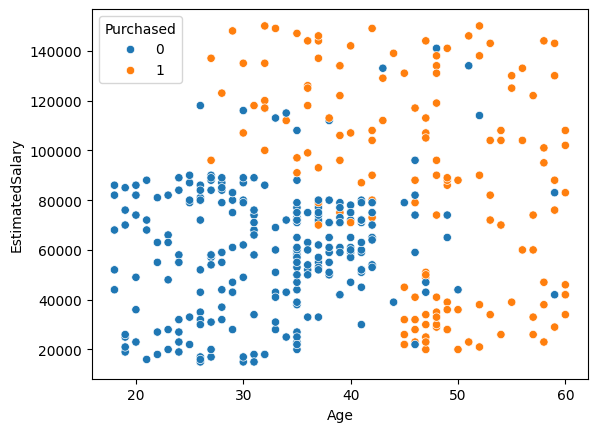

In [76]:
sns.scatterplot(x="Age",y="EstimatedSalary",data=dataset,hue="Purchased")
plt.show()

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)

In [79]:
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
dt=DecisionTreeClassifier(max_depth=5,random_state=42)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [84]:
dt.score(x_test,y_test)

0.9

In [85]:
dt.predict([[19,19000]])

C:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [86]:
dt.predict([[35,20000]])

C:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [87]:
from sklearn.tree import plot_tree

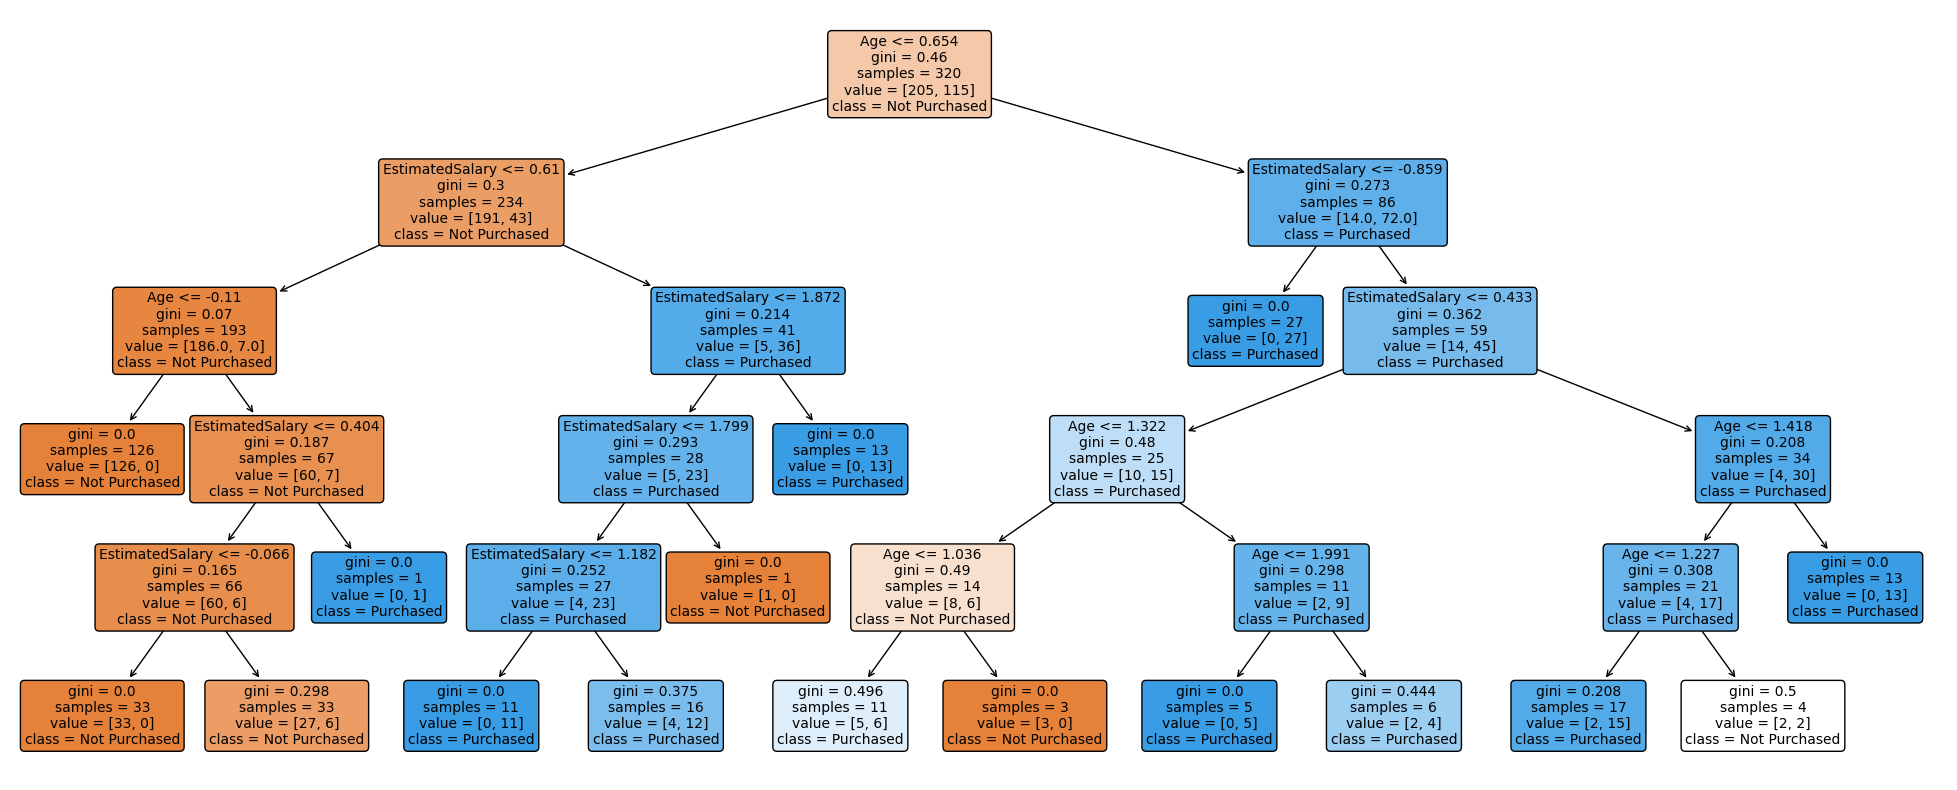

In [88]:
fig = plt.figure(figsize=(25, 10))  # Wider and taller canvas
_ = plot_tree(dt, 
              feature_names=x.columns, 
              class_names=['Not Purchased', 'Purchased'],
              filled=True, 
              rounded=True, 
              fontsize=10)
plt.show()

#plt.savefig("demo.jpg")

In [89]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=42)
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [90]:
dt.score(x_test,y_test)

0.9125

C:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


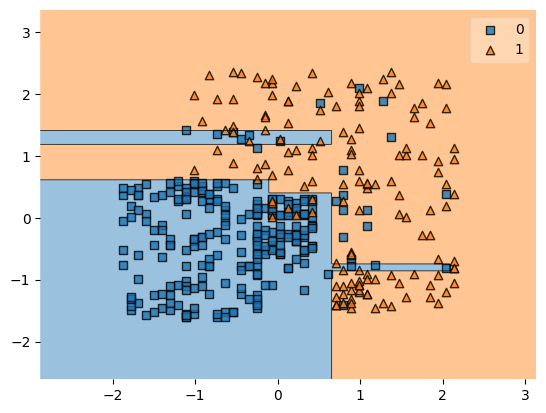

In [91]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
plt.show()

In [92]:
dt.score(x_train,y_train)

0.93125

In [93]:
#for post pruning
for i in range(1,20):
     dt2=DecisionTreeClassifier(max_depth=i)
     dt2.fit(x_train,y_train)
     print(dt2.score(x_train,y_train),dt2.score(x_test,y_test),i)

0.821875 0.9 1
0.91875 0.9125 2
0.91875 0.9125 3
0.93125 0.9125 4
0.934375 0.9 5
0.95 0.8625 6
0.96875 0.85 7
0.971875 0.85 8
0.98125 0.85 9
0.984375 0.85 10
0.990625 0.8375 11
0.99375 0.8375 12
0.99375 0.8375 13
0.996875 0.8375 14
0.996875 0.8375 15
0.996875 0.8375 16
0.996875 0.8375 17
0.996875 0.8375 18
0.996875 0.8375 19
